In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from data_collection import Collection1, Collection2

## Data Collection

In [13]:
[X_train,Y_train,X_test,ID_test] = Collection1.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')

[X_train,Y_train,X_test,ID_test] = Collection2.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')

## Grad Boosting Case Study

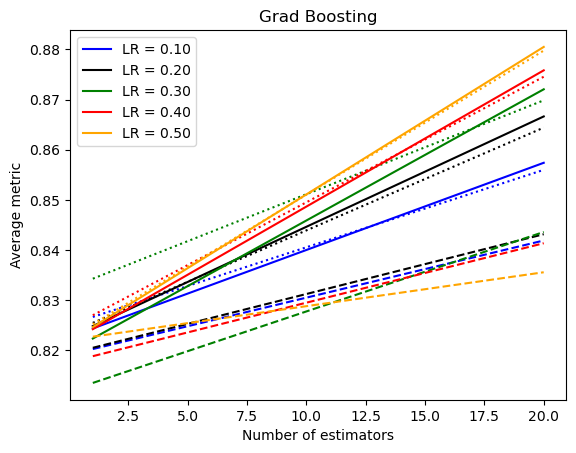

In [9]:
# Grad boosting case study
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)    

n_est_list = np.linspace(1,20,2, dtype='int')
learn_rate_list = np.linspace(0.1,0.5,5)
c = ['b', 'k', 'g', 'r', 'orange']

fig, ax = plt.subplots()

for i,lr in enumerate(learn_rate_list):
    avg_train_metric = np.zeros((len(n_est_list),))
    avg_val_metric = np.zeros((len(n_est_list),))
    avg_full_metric = np.zeros((len(n_est_list),))
    for j,n_est in enumerate(n_est_list):
        train_Metric = 0
        val_Metric = 0
        y_train_prob_avg = 0
        for train_idx, val_idx in kf.split(X_train[:,0]):
            x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
            y_train, y_val = Y_train[train_idx], Y_train[val_idx]

            clf = GradientBoostingClassifier(n_estimators=n_est, learning_rate=lr);
            clf.fit(x_train, y_train.flatten());
            
            y_train_prob = clf.predict_proba(x_train);
            thisMetric = metrics.roc_auc_score(y_train, y_train_prob[:,1]);
            train_Metric += thisMetric

            y_train_prob = clf.predict_proba(x_val);
            thisMetric = metrics.roc_auc_score(y_val, y_train_prob[:,1]);
            val_Metric += thisMetric
            
            y_train_prob = clf.predict_proba(X_train);
            y_train_prob_avg += y_train_prob[:,1]

        avg_train_metric[j] = train_Metric/n_folds
        avg_val_metric[j] = val_Metric/n_folds
        avg_full_metric[j] = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds);

    ax.plot(n_est_list,avg_train_metric, color=c[i], label=f'LR = {lr:0.2f}')
    ax.plot(n_est_list,avg_val_metric, color=c[i], linestyle='--')
    ax.plot(n_est_list,avg_full_metric, color=c[i], linestyle=':')
    ax.set_xlabel('Number of estimators')
    ax.set_ylabel('Average metric')
    plt.title('Grad Boosting')

plt.legend()
plt.show()

## Grad Boosting Collection

In [10]:
n_folds = 5
kf = KFold(n_splits=n_folds)    
i = 0
train_Metric = 0
val_Metric = 0
full_Metric = 0
prob_avg = 0
for train_idx, val_idx in kf.split(X_train[:,0]):
    print(f'--------------- k-fold {i} ---------------')
    x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
    y_train, y_val = Y_train[train_idx], Y_train[val_idx]

    clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1);
    clf.fit(x_train, y_train.flatten());
    
    y_train_prob = clf.predict_proba(x_train);
    thisMetric = metrics.roc_auc_score(y_train, y_train_prob[:,1]);
    train_Metric += thisMetric
    print("Training metric: ",thisMetric)

    y_train_prob = clf.predict_proba(x_val);
    thisMetric = metrics.roc_auc_score(y_val, y_train_prob[:,1]);
    val_Metric += thisMetric
    print("Testing metric: ",thisMetric)

    y_train_prob = clf.predict_proba(X_test);
    prob_avg += y_train_prob[:,1]
    print(' ')

    i += 1

print(f'Average training metric: {train_Metric/n_folds}')
print(f'Average testing metric: {val_Metric/n_folds}')
print(f'Average full metric: {full_Metric/n_folds}')

y_test_prob = prob_avg/n_folds
thisData = np.concatenate((ID_test, np.reshape(y_test_prob,(-1,1))), axis=1);
thisLabel = ['ID','TARGET'];
y_test_prob_pd = pd.DataFrame(data=thisData,columns=thisLabel)
fname_submit = 'test_submission_Ethan.csv';
y_test_prob_pd.to_csv(fname_submit,index=False);
    

--------------- k-fold 0 ---------------
Training metric:  0.8904630393457911
Testing metric:  0.8096029287524641
 
--------------- k-fold 1 ---------------
Training metric:  0.883512963904423
Testing metric:  0.8313552016696157
 
--------------- k-fold 2 ---------------
Training metric:  0.8859848081572047
Testing metric:  0.8050776248399489
 
--------------- k-fold 3 ---------------
Training metric:  0.8932433335485355
Testing metric:  0.8035040600747342
 
--------------- k-fold 4 ---------------
Training metric:  0.8835077227152097
Testing metric:  0.8278964251138761
 
Average training metric: 0.8873423735342328
Average testing metric: 0.8154872480901278
Average full metric: 0.0
